In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from pylab import savefig
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import datetime
import math

In [49]:
hour_data = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\capital-bike-share\2011-12 Exploratory analysis\data set\hour.csv")

In [50]:
hour_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [52]:
hour_data = hour_data.rename(columns={'dteday': 'date', 'yr': 'year','hr':'hours','mnth':'month', 'weathersit': 'weather type','temp':'temparature','atemp': 'feelslike','hum':'humidity','cnt':'count'})

In [53]:
hour_data.head(5)

,instant,date,season,year,month,hours,holiday,weekday,workingday,weather type,temparature,feelslike,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
hour_data.loc[hour_data['holiday'] == 0, 'holiday'] = 'No'

hour_data.loc[hour_data['holiday'] == 1, 'holiday'] = 'Yes'

In [55]:
hour_data.head(5)

,instant,date,season,year,month,hours,holiday,weekday,workingday,weather type,temparature,feelslike,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [56]:
hour_data.loc[hour_data['workingday'] == 0, 'workingday'] = 'dayoff'

hour_data.loc[hour_data['workingday'] == 1, 'workingday'] = 'workday'

In [57]:
hour_data.head(5)

,instant,date,season,year,month,hours,holiday,weekday,workingday,weather type,temparature,feelslike,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,No,6,dayoff,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,No,6,dayoff,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,No,6,dayoff,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,No,6,dayoff,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,No,6,dayoff,1,0.24,0.2879,0.75,0.0,0,1,1


In [58]:
hour_data.loc[hour_data['month'] == 1, 'month'] = 'January'
hour_data.loc[hour_data['month'] == 2, 'month'] = 'February'
hour_data.loc[hour_data['month'] == 3, 'month'] = 'March'
hour_data.loc[hour_data['month'] == 4, 'month'] = 'April'
hour_data.loc[hour_data['month'] == 5, 'month'] = 'May'
hour_data.loc[hour_data['month'] == 6, 'month'] = 'June'
hour_data.loc[hour_data['month'] == 7, 'month'] = 'July'
hour_data.loc[hour_data['month'] == 8, 'month'] = 'August'
hour_data.loc[hour_data['month'] == 9, 'month'] = 'September'
hour_data.loc[hour_data['month'] == 10, 'month'] = 'October'
hour_data.loc[hour_data['month'] == 11, 'month'] = 'November'
hour_data.loc[hour_data['month'] == 12, 'month'] = 'December'

In [59]:
hour_data.head(5)

,instant,date,season,year,month,hours,holiday,weekday,workingday,weather type,temparature,feelslike,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,January,0,No,6,dayoff,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,No,6,dayoff,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,No,6,dayoff,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,No,6,dayoff,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,No,6,dayoff,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
hour_data.loc[hour_data['weekday'] == 0, 'weekday'] = 'sunday'
hour_data.loc[hour_data['weekday'] == 1, 'weekday'] = 'monday'
hour_data.loc[hour_data['weekday'] == 2, 'weekday'] = 'tuesday'
hour_data.loc[hour_data['weekday'] == 3, 'weekday'] = 'wednesday'
hour_data.loc[hour_data['weekday'] == 4, 'weekday'] = 'thursday'
hour_data.loc[hour_data['weekday'] == 5, 'weekday'] = 'friday'
hour_data.loc[hour_data['weekday'] == 6, 'weekday'] = 'saturday'

In [61]:
hour_data.loc[hour_data['weather type'] == 1, 'weather type'] = 'sunny'
hour_data.loc[hour_data['weather type'] == 2, 'weather type'] = 'cloudy'
hour_data.loc[hour_data['weather type'] == 3, 'weather type'] = 'rainy'
hour_data.loc[hour_data['weather type'] == 4, 'weather type'] = 'stormy'

In [62]:
new_hour = hour_data

In [63]:
new_hour

,instant,date,season,year,month,hours,holiday,weekday,workingday,weather type,temparature,feelslike,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,January,0,No,saturday,dayoff,sunny,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,January,1,No,saturday,dayoff,sunny,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,January,2,No,saturday,dayoff,sunny,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,January,3,No,saturday,dayoff,sunny,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,January,4,No,saturday,dayoff,sunny,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,December,19,No,monday,workday,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,December,20,No,monday,workday,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,December,21,No,monday,workday,sunny,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,December,22,No,monday,workday,sunny,0.26,0.2727,0.56,0.1343,13,48,61


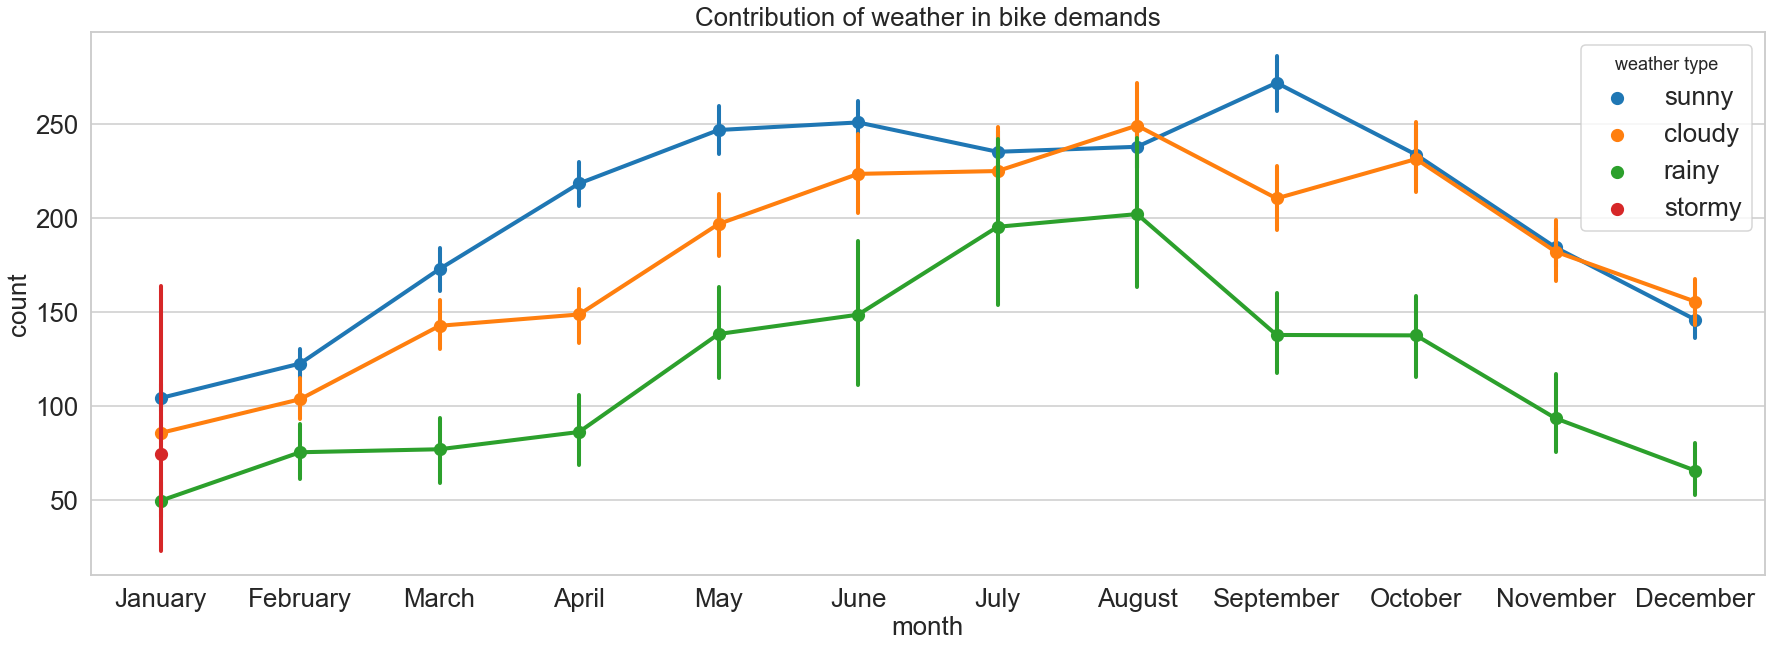

In [64]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
fig,ax = plt.subplots()
sns.pointplot(data=hour_data[['month',
                           'count',
                           'weather type']],
              x='month',
              y='count',
              hue='weather type',
              ax=ax)
ax.set(title="Contribution of weather in bike demands");